# Análisis Descriptivo
1. Estadísticas Descriptivas:
   * Medidas de tendencia central
   * Medidas de dispersión
   * Medidas de forma
   * Análisis de percentiles

2. Visualizaciones:
   * Series temporales
   * Gráficos de composición
   * Diagramas de dispersión matriciales
   * Mapas de calor interactivos

In [1]:
# Tratamiento de datos
import pandas as pd
import numpy as np

# Gráficos

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from scipy import stats

# Estadística 
import scipy

In [2]:
df = pd.read_csv(r'C:\Users\nuria\Proyecto_EDA\data\raw\Student Depression Dataset.csv')
df.head(2)

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0


In [3]:
df.set_index('id')

,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
id,,,,,,,,,,,,,,,,,
2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0
26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes,0
30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,7-8 hours,Moderate,BCA,Yes,4.0,5.0,Yes,1
32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,5-6 hours,Moderate,M.Tech,Yes,1.0,1.0,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140685,Female,27.0,Surat,Student,5.0,0.0,5.75,5.0,0.0,5-6 hours,Unhealthy,Class 12,Yes,7.0,1.0,Yes,0
140686,Male,27.0,Ludhiana,Student,2.0,0.0,9.40,3.0,0.0,Less than 5 hours,Healthy,MSc,No,0.0,3.0,Yes,0
140689,Male,31.0,Faridabad,Student,3.0,0.0,6.61,4.0,0.0,5-6 hours,Unhealthy,MD,No,12.0,2.0,No,0


## Estadísticas descriptivas

In [4]:
# Filtrar solo columnas numéricas
numeric_df = df.select_dtypes(include='number')

# 1. Medidas de tendencia central
mean = numeric_df.mean()  # Media
median = numeric_df.median()  # Mediana
mode = numeric_df.mode().iloc[0]  # Moda

# 2. Medidas de dispersión
std_dev = numeric_df.std()  # Desviación estándar
variance = numeric_df.var()  # Varianza
range_ = numeric_df.max() - numeric_df.min()  # Rango
iqr = numeric_df.quantile(0.75) - numeric_df.quantile(0.25)  # Rango intercuartílico

# 3. Medidas de forma
skewness = numeric_df.skew()  # Asimetría
kurtosis = numeric_df.kurtosis()  # Curtosis

# 4. Análisis de percentiles
percentiles = numeric_df.quantile([0.25, 0.5, 0.75])  # Percentiles 25, 50, 75

### Medidas de tendencia central

In [13]:
print("Medidas de tendencia central:")
print("Media:\n", mean)

Medidas de tendencia central:
Media:
 id                    70442.149421
Age                      25.822300
Academic Pressure         3.141214
Work Pressure             0.000430
CGPA                      7.656104
Study Satisfaction        2.943837
Job Satisfaction          0.000681
Work/Study Hours          7.156984
Financial Stress          3.139867
Depression                0.585499
dtype: float64


In [14]:
print("Mediana:\n", median)

Mediana:
 id                    70684.00
Age                      25.00
Academic Pressure         3.00
Work Pressure             0.00
CGPA                      7.77
Study Satisfaction        3.00
Job Satisfaction          0.00
Work/Study Hours          8.00
Financial Stress          3.00
Depression                1.00
dtype: float64


In [15]:
print("Moda:\n", mode)

Moda:
 id                     2.00
Age                   24.00
Academic Pressure      3.00
Work Pressure          0.00
CGPA                   8.04
Study Satisfaction     4.00
Job Satisfaction       0.00
Work/Study Hours      10.00
Financial Stress       5.00
Depression             1.00
Name: 0, dtype: float64


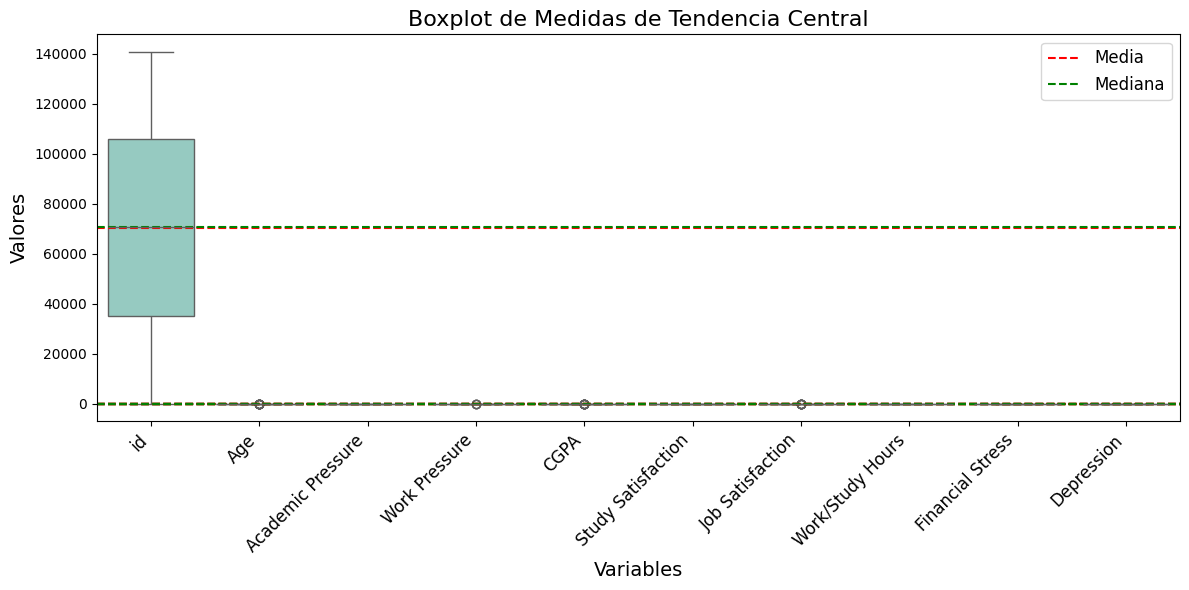

In [57]:
# Configuración de la figura
plt.figure(figsize=(12, 6))  # Aumentar el tamaño de la figura
plt.subplot(1, 1, 1)

# Boxplot de las medidas
sns.boxplot(data=numeric_df, palette='Set3')

# Título y etiquetas
plt.title('Boxplot de Medidas de Tendencia Central', fontsize=16)
plt.ylabel('Valores', fontsize=14)
plt.xlabel('Variables', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)

# Añadir líneas de referencia para la media y la mediana
for i, col in enumerate(numeric_df.columns):
    mean_value = numeric_df[col].mean()
    median_value = numeric_df[col].median()
    
    plt.axhline(y=mean_value, color='red', linestyle='--', label='Media' if i == 0 else "")
    plt.axhline(y=median_value, color='green', linestyle='--', label='Mediana' if i == 0 else "")

plt.legend(fontsize=12)

plt.tight_layout()
plt.show()


### Medidas de dispersión:

In [16]:
print("\nMedidas de dispersión:")
print("Desviación estándar:\n", std_dev)
print("Varianza:\n", variance)


Medidas de dispersión:
Desviación estándar:
 id                    40641.175216
Age                       4.905687
Academic Pressure         1.381465
Work Pressure             0.043992
CGPA                      1.470707
Study Satisfaction        1.361148
Job Satisfaction          0.044394
Work/Study Hours          3.707642
Financial Stress          1.437347
Depression                0.492645
dtype: float64
Varianza:
 id                    1.651705e+09
Age                   2.406577e+01
Academic Pressure     1.908445e+00
Work Pressure         1.935299e-03
CGPA                  2.162980e+00
Study Satisfaction    1.852724e+00
Job Satisfaction      1.970862e-03
Work/Study Hours      1.374661e+01
Financial Stress      2.065966e+00
Depression            2.426987e-01
dtype: float64


In [26]:
print("Rango:\n", range_)
print("Rango intercuartílico:\n", iqr)

Rango:
 id                    140697.0
Age                       41.0
Academic Pressure          5.0
Work Pressure              5.0
CGPA                      10.0
Study Satisfaction         5.0
Job Satisfaction           4.0
Work/Study Hours          12.0
Financial Stress           4.0
Depression                 1.0
dtype: float64
Rango intercuartílico:
 id                    70779.00
Age                       9.00
Academic Pressure         2.00
Work Pressure             0.00
CGPA                      2.63
Study Satisfaction        2.00
Job Satisfaction          0.00
Work/Study Hours          6.00
Financial Stress          2.00
Depression                1.00
dtype: float64


C:\Users\nuria\AppData\Local\Temp\ipykernel_29908\663002479.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=numeric_df.columns, y=std_dev, palette='viridis')


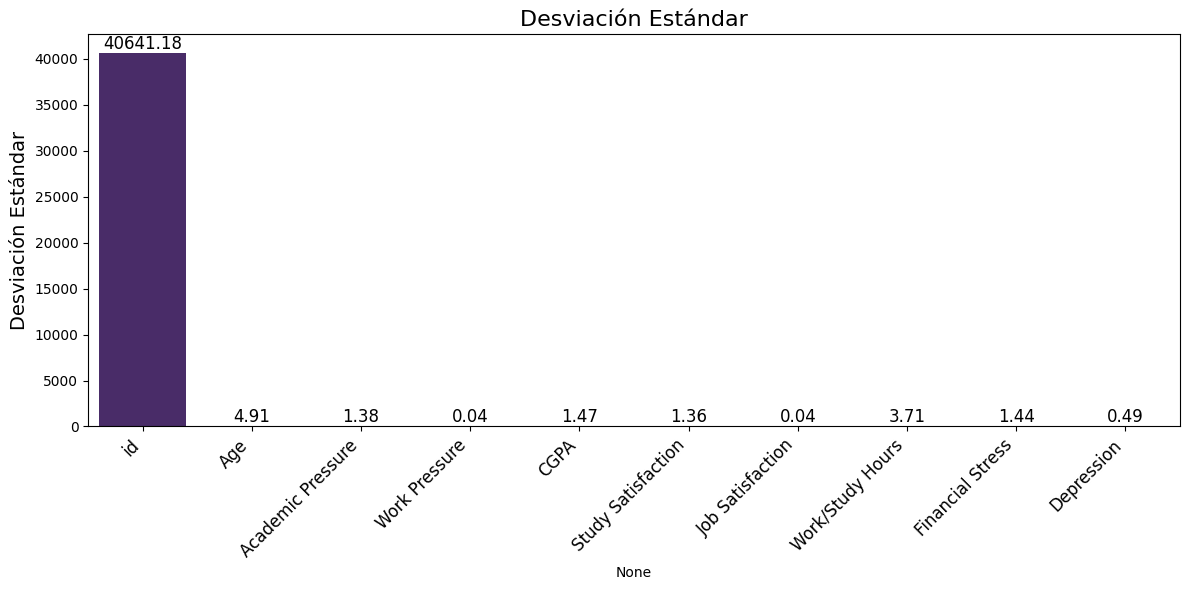

In [58]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 1, 1)

# Gráfico de barras de Desviación Estándar
sns.barplot(x=numeric_df.columns, y=std_dev, palette='viridis')

# Título y etiquetas
plt.title('Desviación Estándar', fontsize=16)
plt.ylabel('Desviación Estándar', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)

# Añadir etiquetas de datos
for i, value in enumerate(std_dev):
    plt.text(i, value, f'{value:.2f}', ha='center', va='bottom', fontsize=12)

plt.tight_layout()
plt.show()


### Medidas de formas

In [41]:
print("\nMedidas de forma:")
print("Asimetría:\n", skewness)
print("Curtosis:\n", kurtosis)


Medidas de forma:
Asimetría:
 id                     -0.005380
Age                     0.132239
Academic Pressure      -0.135165
Work Pressure         108.594361
CGPA                   -0.113063
Study Satisfaction      0.010423
Job Satisfaction       74.105663
Work/Study Hours       -0.454769
Financial Stress       -0.130304
Depression             -0.347126
dtype: float64
Curtosis:
 id                       -1.207073
Age                      -0.846206
Academic Pressure        -1.161170
Work Pressure         12110.636193
CGPA                     -1.023144
Study Satisfaction       -1.223155
Job Satisfaction       5926.997388
Work/Study Hours         -0.999618
Financial Stress         -1.324691
Depression               -1.879638
dtype: float64


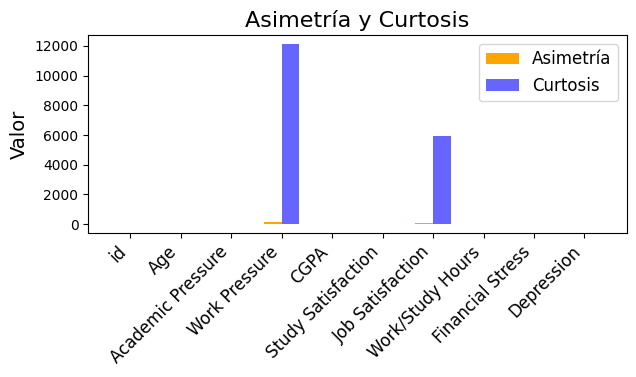

In [55]:
plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 3)
bar_width = 0.35
x = range(len(numeric_df.columns))

# Gráfico de Asimetría
plt.bar(x, skewness, width=bar_width, color='orange', label='Asimetría', align='center')
# Gráfico de Curtosis, desplazado por el ancho de las barras
plt.bar([p + bar_width for p in x], kurtosis, width=bar_width, color='blue', label='Curtosis', align='center', alpha=0.6)

plt.title('Asimetría y Curtosis', fontsize=16)
plt.ylabel('Valor', fontsize=14)
plt.xticks([p + bar_width / 2 for p in x], numeric_df.columns, rotation=45, ha='right', fontsize=12)  # Ajustar rotación y alineación
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()


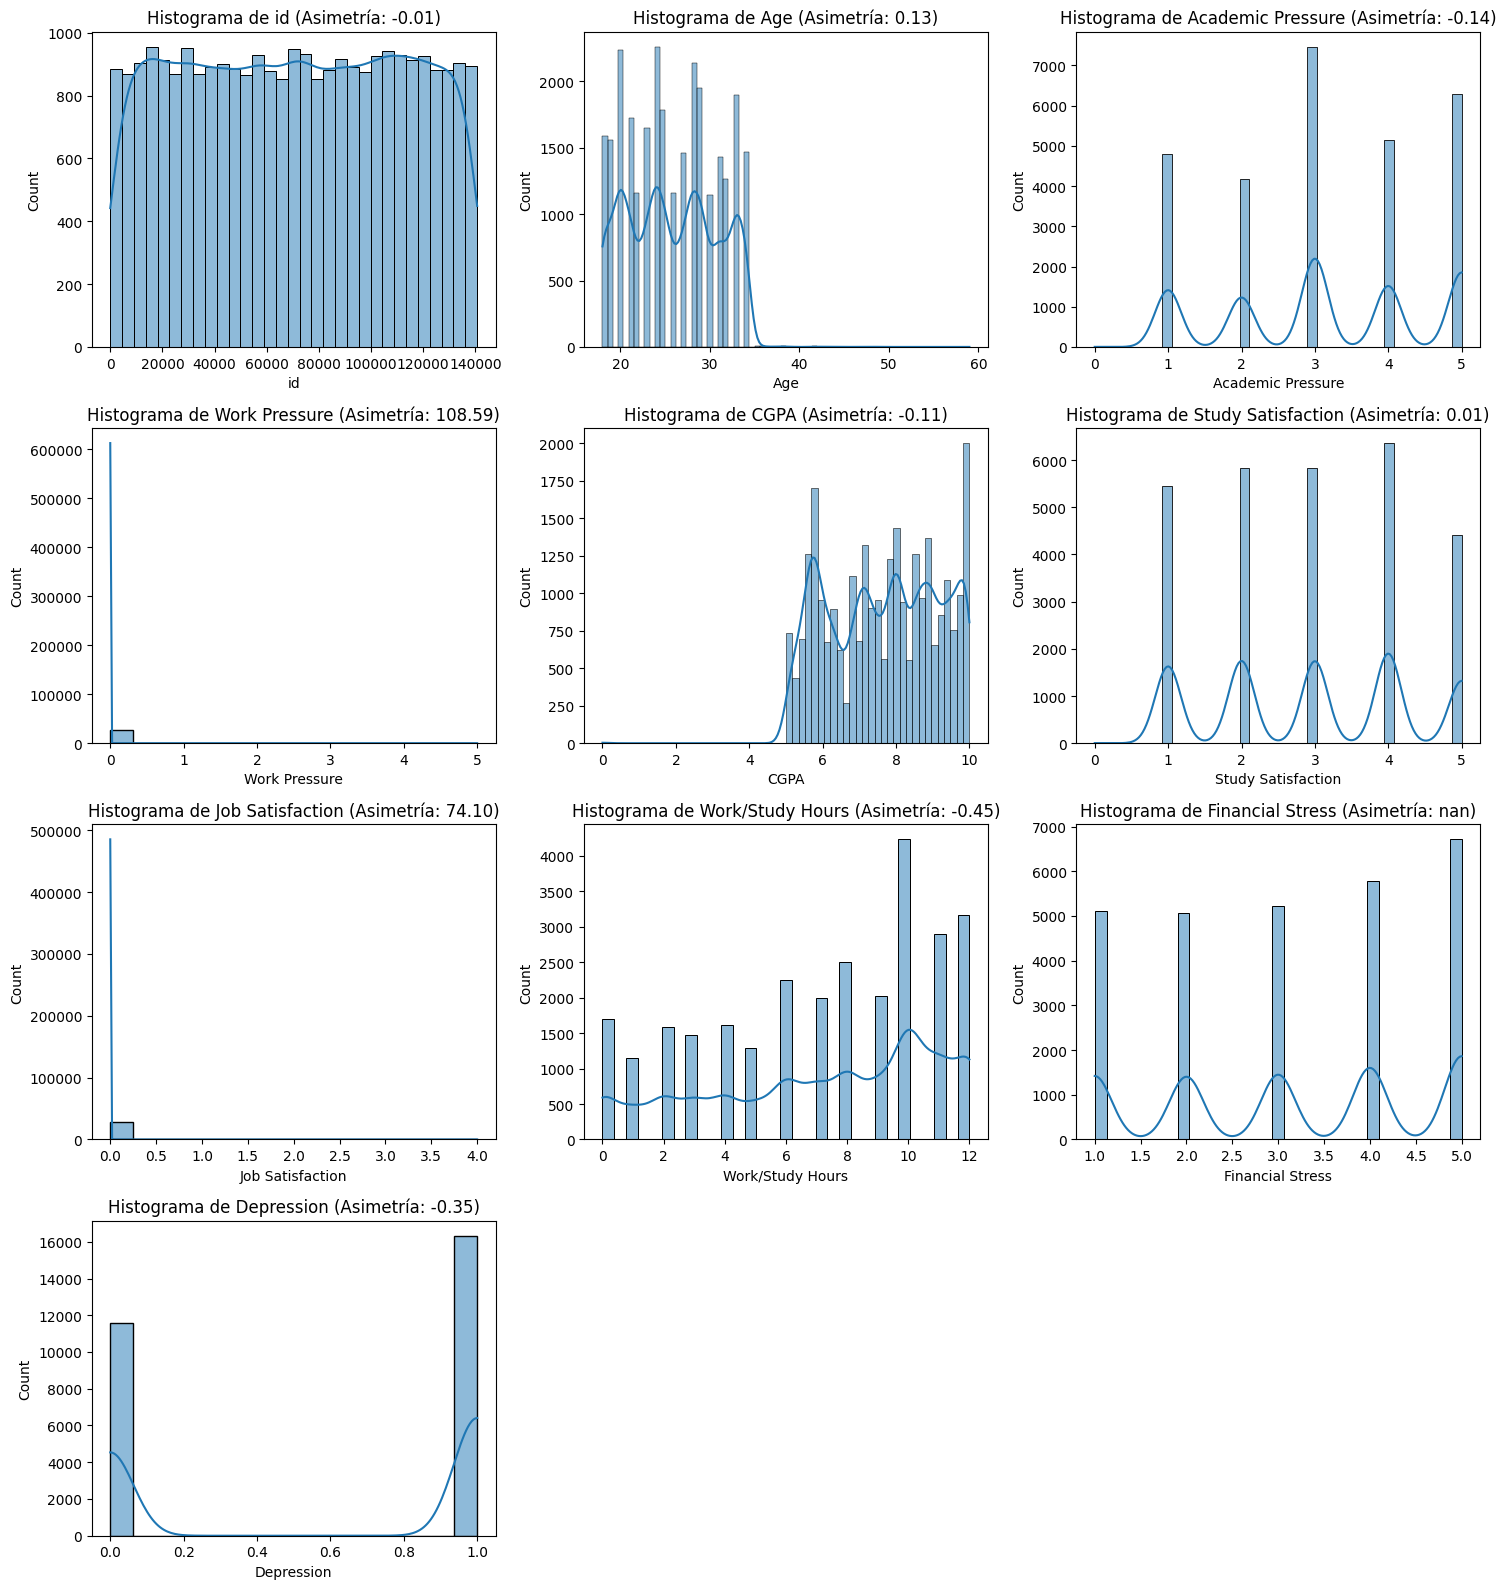

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
import math

# Cargar los datos
df = pd.read_csv(r'C:\Users\nuria\Proyecto_EDA\data\raw\Student Depression Dataset.csv')

# Identificar las columnas numéricas (en caso de que haya variables no numéricas)
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Calcular el número de filas y columnas para los subgráficos dinámicamente
num_columns = 3  # Número de columnas de subgráficos
num_rows = math.ceil(len(numerical_columns) / num_columns)  # Número de filas necesarias

# Crear un gráfico de histogramas para cada variable numérica
plt.figure(figsize=(num_columns * 5, num_rows * 4))  # Ajusta el tamaño de la figura

for i, column in enumerate(numerical_columns, 1):
    plt.subplot(num_rows, num_columns, i)  # Subgráficos dinámicos
    sns.histplot(df[column], kde=True)  # Histograma con densidad
    plt.title(f'Histograma de {column} (Asimetría: {skew(df[column]):.2f})')

plt.tight_layout()
plt.show()


### Percentiles:

In [44]:
print("\nAnálisis de percentiles:")
print(percentiles)


Análisis de percentiles:
            id   Age  Academic Pressure  Work Pressure  CGPA  Study Satisfaction  Job Satisfaction  Work/Study Hours  Financial Stress  Depression
0.25   35039.0  21.0                2.0            0.0  6.29                 2.0               0.0               4.0               2.0         0.0
0.50   70684.0  25.0                3.0            0.0  7.77                 3.0               0.0               8.0               3.0         1.0
0.75  105818.0  30.0                4.0            0.0  8.92                 4.0               0.0              10.0               4.0         1.0


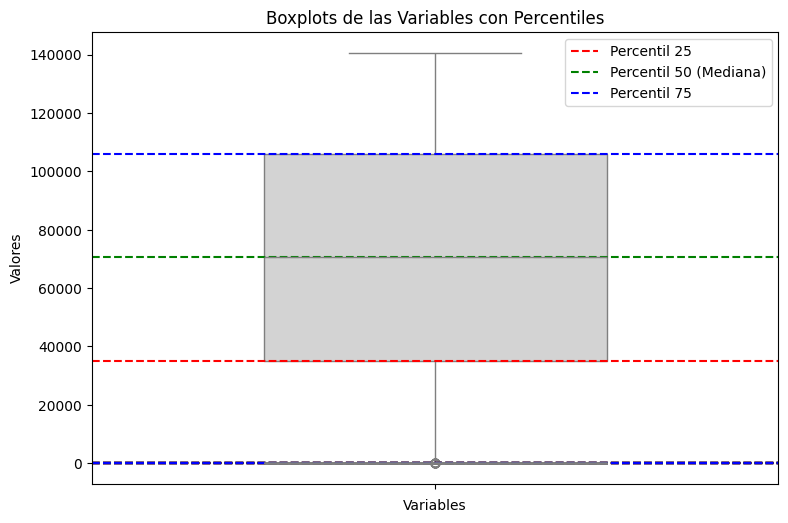

In [52]:
numeric_df = df.select_dtypes(include='number')
# percentiles
percentiles = numeric_df.quantile([0.25, 0.5, 0.75])

plt.figure(figsize=(15, 10))
plt.subplot(2, 2, 4)
for i, col in enumerate(numeric_df.columns):
    sns.boxplot(data=numeric_df[col], color='lightgray', width=0.5)
    plt.axhline(y=percentiles.loc[0.25, col], color='r', linestyle='--', label='Percentil 25' if i == 0 else "")
    plt.axhline(y=percentiles.loc[0.5, col], color='g', linestyle='--', label='Percentil 50 (Mediana)' if i == 0 else "")
    plt.axhline(y=percentiles.loc[0.75, col], color='b', linestyle='--', label='Percentil 75' if i == 0 else "")

plt.title('Boxplots de las Variables con Percentiles')
plt.ylabel('Valores')
plt.xlabel('Variables')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


## Visualizaciones

### Series temporales: (no)

In [65]:
df.columns

Index(['id', 'Gender', 'Age', 'City', 'Profession', 'Academic Pressure',
       'Work Pressure', 'CGPA', 'Study Satisfaction', 'Job Satisfaction',
       'Sleep Duration', 'Dietary Habits', 'Degree',
       'Have you ever had suicidal thoughts ?', 'Work/Study Hours',
       'Financial Stress', 'Family History of Mental Illness', 'Depression'],
      dtype='object')

### Gráficos de composición:

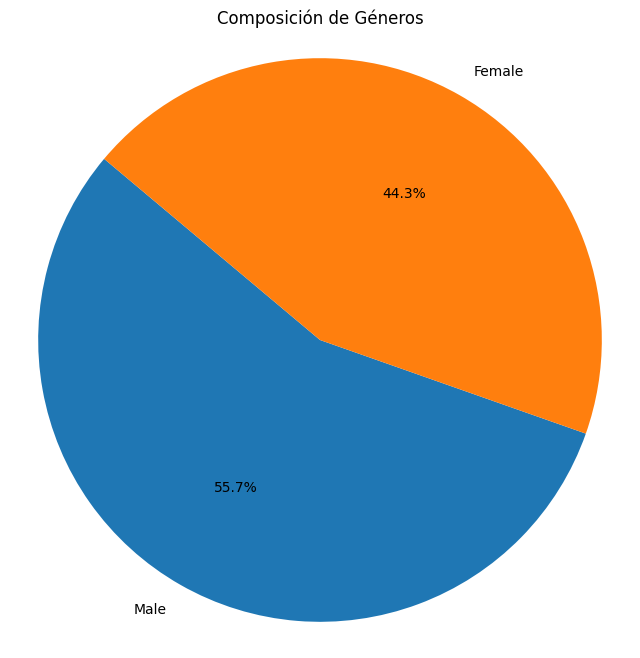

In [64]:
# Supongamos que hay una columna categórica llamada 'Gender'
gender_counts = df['Gender'].value_counts()

# Gráfico de Pastel
plt.figure(figsize=(8, 8))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Composición de Géneros')
plt.axis('equal')  # Para que el gráfico sea un círculo
plt.show()


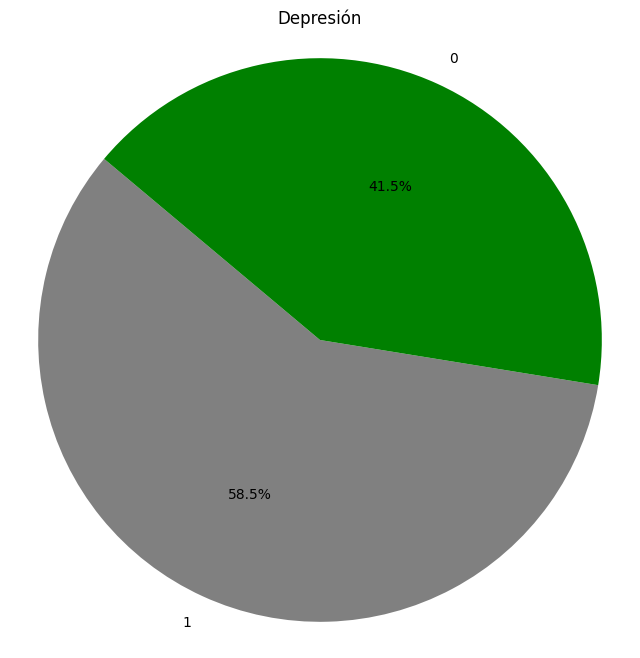

In [76]:
gender_counts = df['Depression'].value_counts()

# Definir los colores 
colors = ['green' if label == 0 else 'grey' for label in gender_counts.index]

# Gráfico de Pastel
plt.figure(figsize=(8, 8))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Depresión')
plt.axis('equal')  # Para que el gráfico sea un círculo
plt.show()


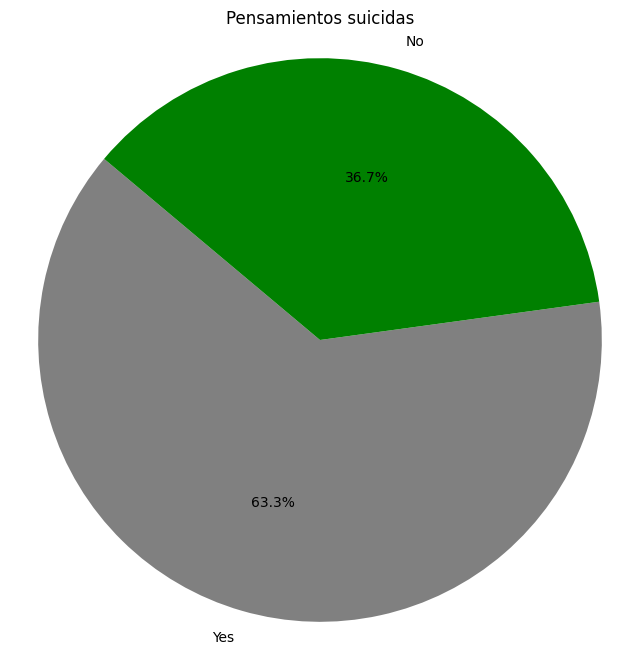

In [83]:
# Contar la cantidad de cada respuesta en 'Have you ever had suicidal thoughts ?'
suicidal_counts = df['Have you ever had suicidal thoughts ?'].value_counts()

colors = ['green' if label == 'No' else 'grey' for label in suicidal_counts.index]

# Gráfico de Pastel
plt.figure(figsize=(8, 8))
plt.pie(suicidal_counts, labels=suicidal_counts.index, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Pensamientos suicidas')
plt.axis('equal')  # Para que el gráfico sea un círculo
plt.show()


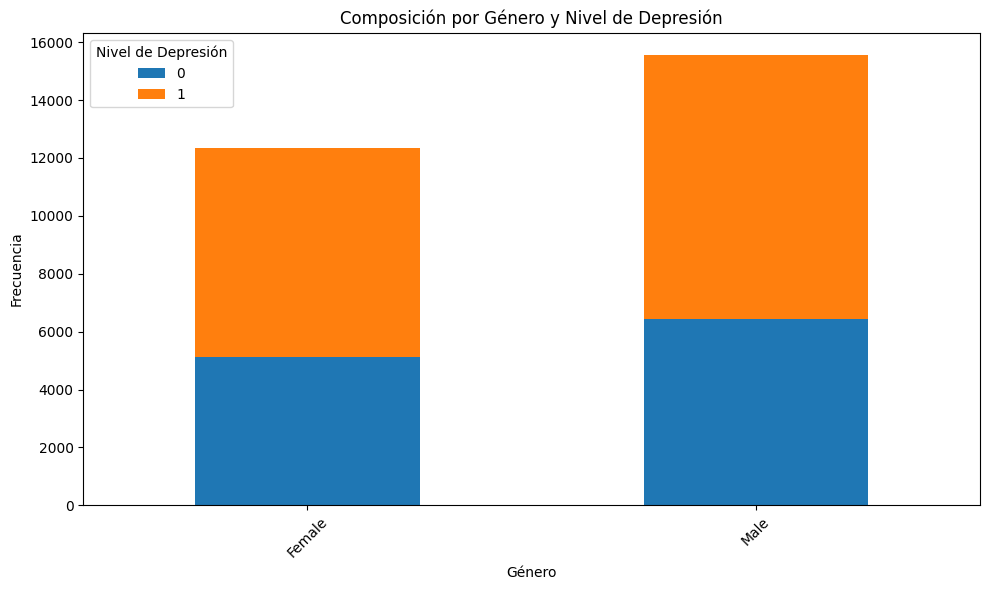

In [69]:
composition_data = df.groupby(['Gender', 'Depression']).size().unstack(fill_value=0)

composition_data.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Composición por Género y Nivel de Depresión')
plt.xlabel('Género')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.legend(title='Nivel de Depresión')
plt.tight_layout()
plt.show()


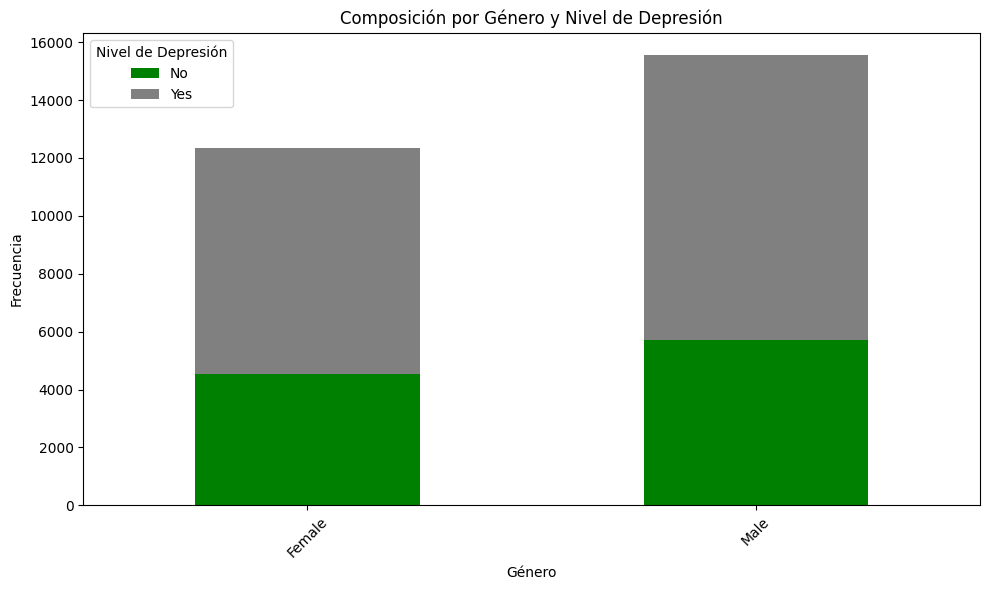

In [86]:
composition_data = df.groupby(['Gender', 'Have you ever had suicidal thoughts ?']).size().unstack(fill_value=0)

colors = ['green', 'grey'] 

# Gráfico de Barras Apiladas
composition_data.plot(kind='bar', stacked=True, figsize=(10, 6), color=colors)
plt.title('Composición por Género y Nivel de Depresión')
plt.xlabel('Género')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.legend(title='Nivel de Depresión')
plt.tight_layout()
plt.show()


### Diagramas de dispersión matriciales:

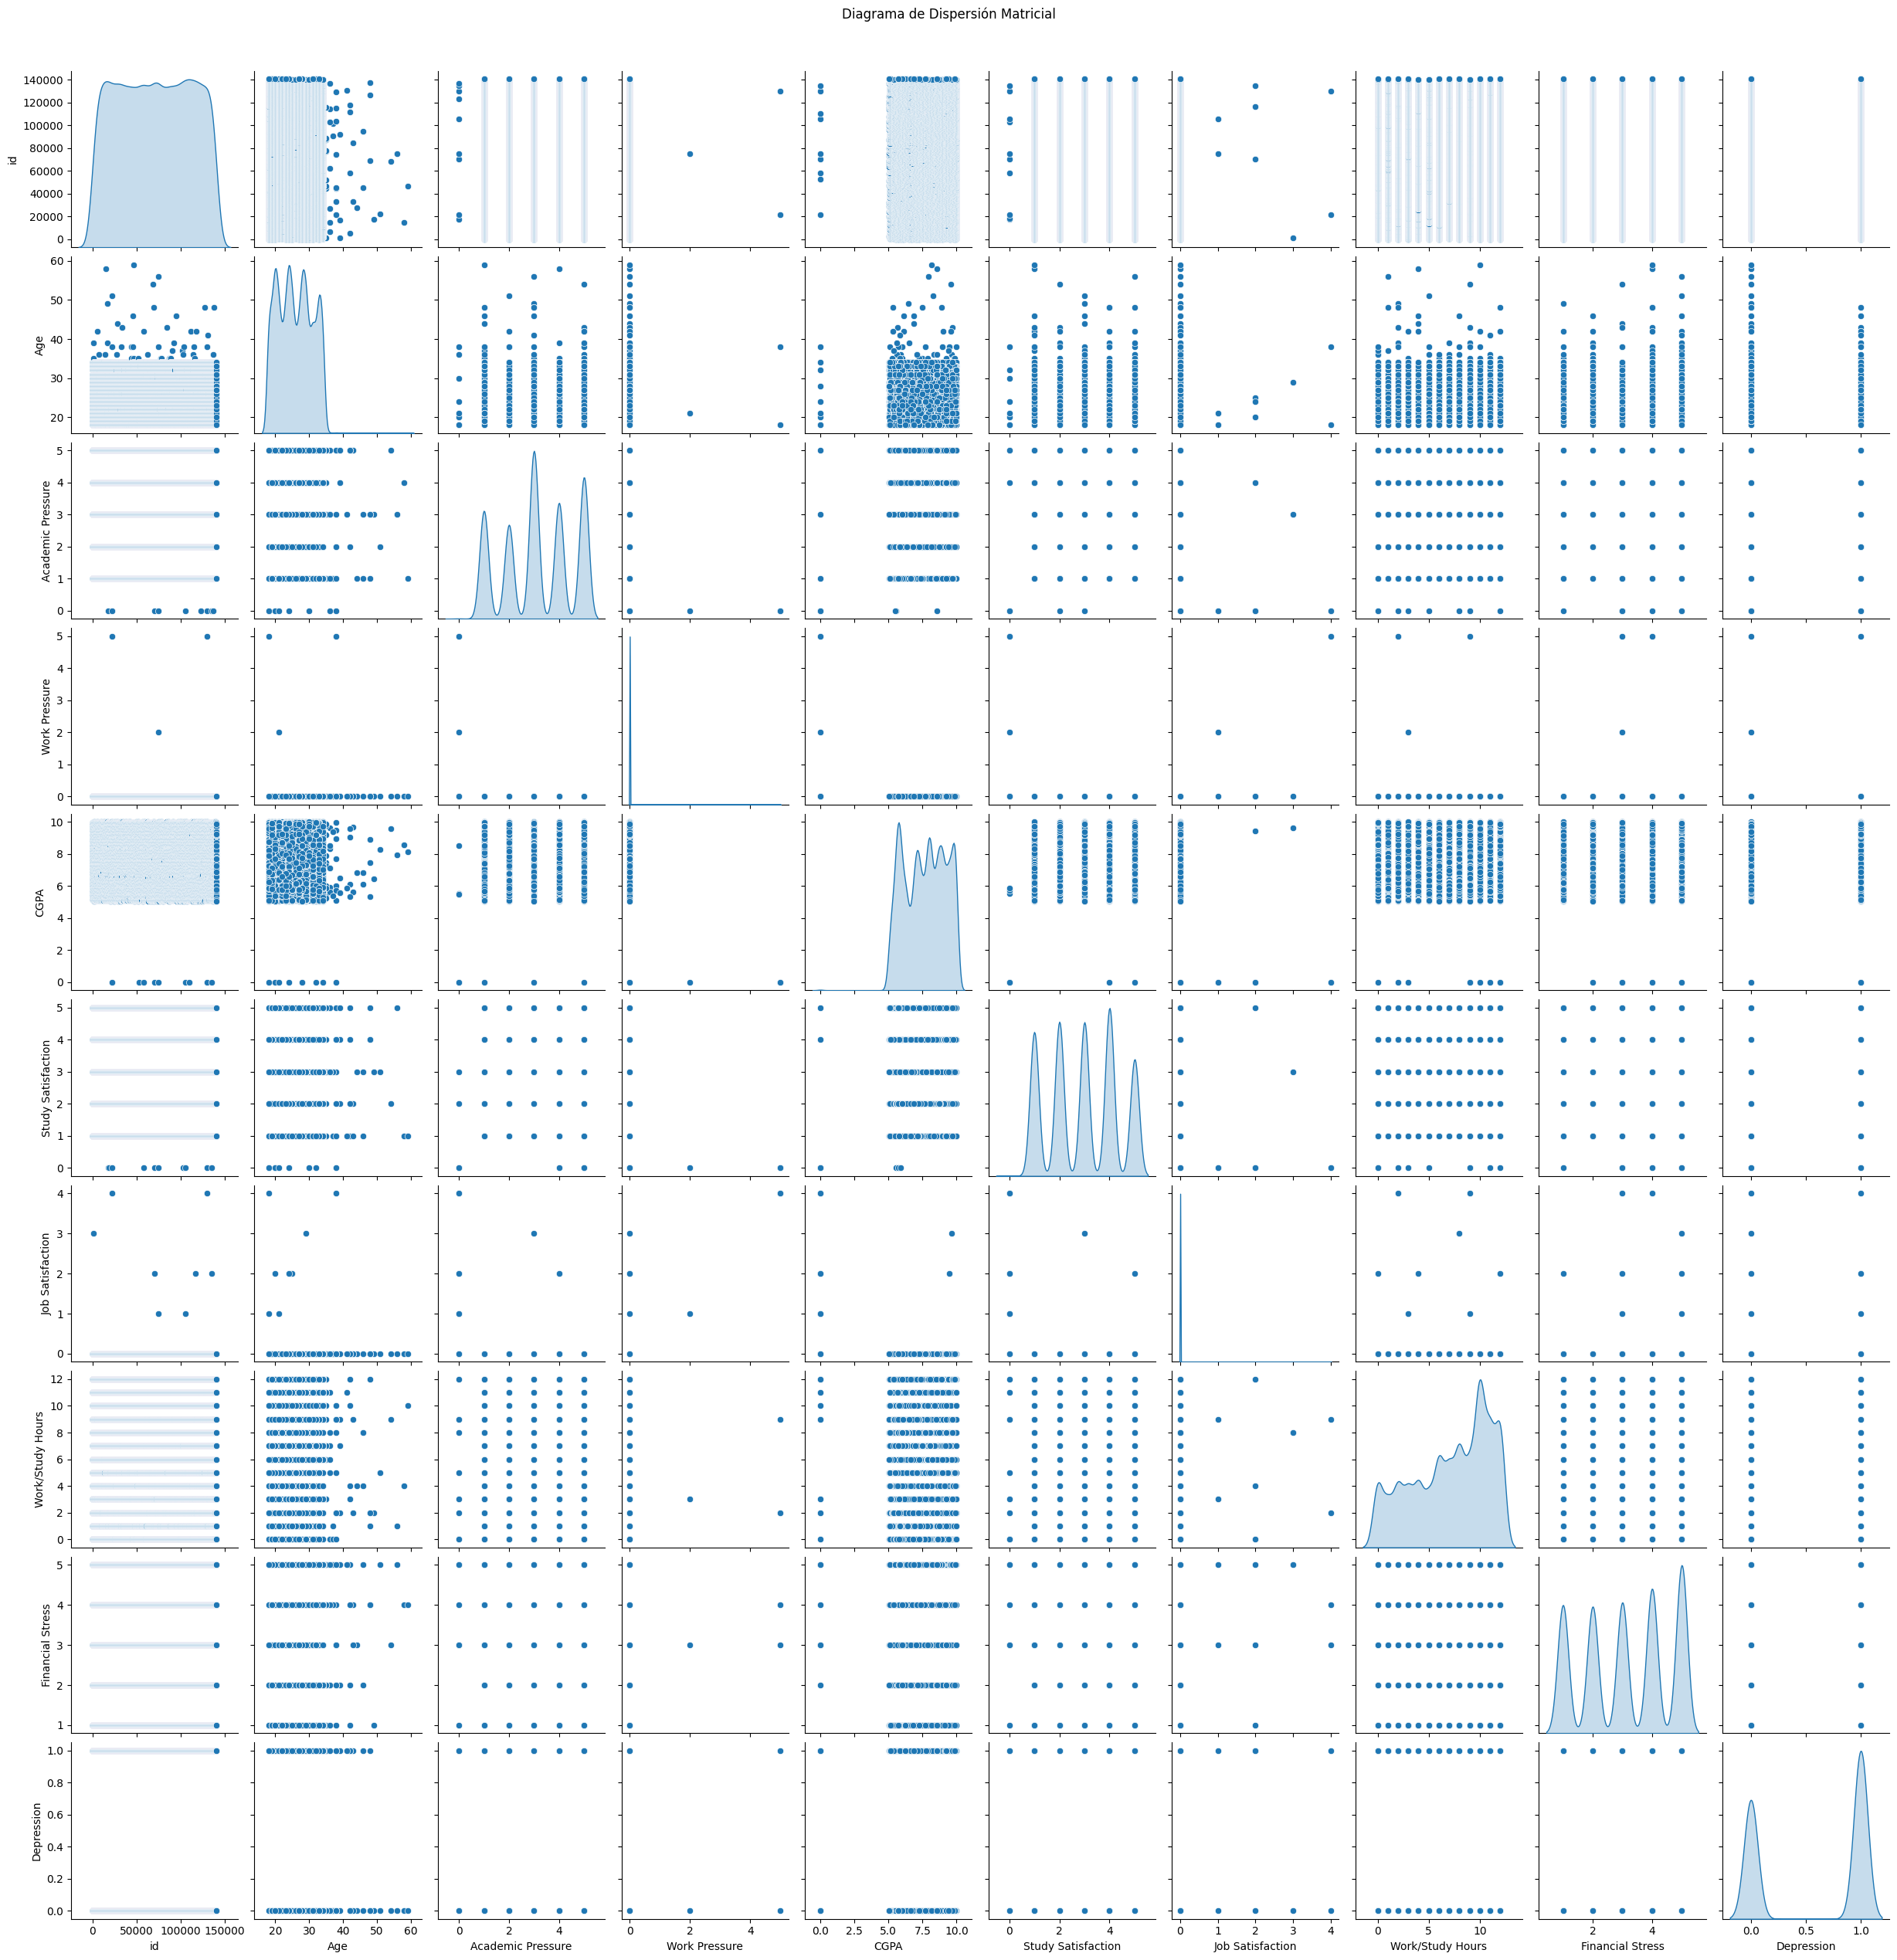

In [87]:
numeric_columns = df.select_dtypes(include='number').columns.tolist()

sns.pairplot(df[numeric_columns], diag_kind='kde', markers='o')
plt.suptitle('Diagrama de Dispersión Matricial', y=1.02)  # Añadir un título
plt.show()


### Mapas de calor interactivos:

In [90]:
import plotly.express as px

numeric_columns = df.select_dtypes(include='number').columns.tolist()

correlation_matrix = df[numeric_columns].corr()

# Mapa de calor interactivo 
fig = px.imshow(correlation_matrix, 
                color_continuous_scale=px.colors.sequential.Plasma,
                title='Mapa de Calor de Correlaciones',
                labels=dict(x='Variables', y='Variables', color='Correlación'))

fig.show()


### Extra importante

In [8]:
df.columns

Index(['id', 'Gender', 'Age', 'City', 'Profession', 'Academic Pressure',
       'Work Pressure', 'CGPA', 'Study Satisfaction', 'Job Satisfaction',
       'Sleep Duration', 'Dietary Habits', 'Degree',
       'Have you ever had suicidal thoughts ?', 'Work/Study Hours',
       'Financial Stress', 'Family History of Mental Illness', 'Depression'],
      dtype='object')

   Depression Have you ever had suicidal thoughts ?
0           1                                   Yes
1           0                                    No
2           0                                    No
3           1                                   Yes
4           0                                   Yes


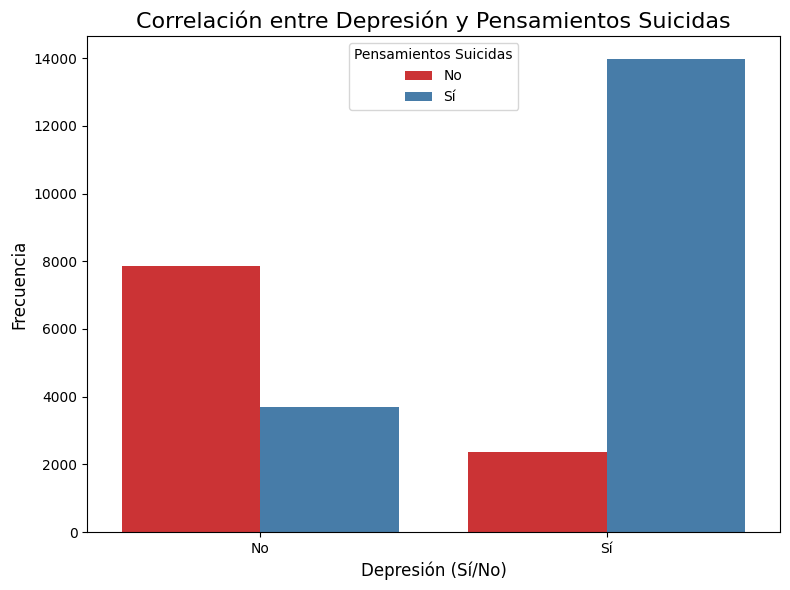

In [ ]:
print(df[['Depression', 'Have you ever had suicidal thoughts ?']].head())

# Graficar la relación entre 'depression' y 'Have you ever had suicidal thoughts'
plt.figure(figsize=(8, 6))
sns.countplot(x='Depression', hue='Have you ever had suicidal thoughts ?', data=df, palette='Set1')

plt.title('Correlación entre Depresión y Pensamientos Suicidas', fontsize=16)
plt.xlabel('Depresión (Sí/No)', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.xticks(ticks=[0, 1], labels=['No', 'Sí'])
plt.legend(title='Pensamientos Suicidas', loc='upper center', labels=['No', 'Sí'])

plt.tight_layout()
plt.show()


Se observa la gran relación de la depresión con los pensamientos y acciones suicidas, algo con bastante relevancia para el estudio.